In [11]:
import pickle

with open('hourly_summary.pickle', 'rb') as file:
    data = pickle.load(file)

print(data)


{'73455754': {'HR':     Hour  Min  #QRS's  Min.  Ave.  Max.  Pauses
0     14   26    2592    75   100   148       0
1     15   57    6199    80   108   151       0
2     16   58    5814    71    99   172       0
3     17   58    5994    79   104   141       0
4     18   60    5826    75    97   130       0
5     19   59    5519    70    94   133       0
6     20   59    5966    74   100   133       0
7     21   60    5621    70    94   123       0
8     22   60    5034    60    84   116       0
9     23   60    4462    56    74   127       0
10     0   60    4592    55    77   125       0
11     1   60    4275    55    71   122       0
12     2   60    4401    56    73   124       0
13     3   60    4493    56    75   128       0
14     4   60    4656    58    78   150       0
15     5   58    4978    58    86   131       0
16     6   59    4891    62    83   137       0
17     7   60    4886    64    81   129       0
18     8   60    5028    64    84   150       0
19     9   60    614

In [12]:
import pickle

with open('hourly_summary.pickle', 'rb') as file:
    data = pickle.load(file)

pid = '73455754'  
hr_data = data[pid]['HR']

print(hr_data)

    Hour  Min  #QRS's  Min.  Ave.  Max.  Pauses
0     14   26    2592    75   100   148       0
1     15   57    6199    80   108   151       0
2     16   58    5814    71    99   172       0
3     17   58    5994    79   104   141       0
4     18   60    5826    75    97   130       0
5     19   59    5519    70    94   133       0
6     20   59    5966    74   100   133       0
7     21   60    5621    70    94   123       0
8     22   60    5034    60    84   116       0
9     23   60    4462    56    74   127       0
10     0   60    4592    55    77   125       0
11     1   60    4275    55    71   122       0
12     2   60    4401    56    73   124       0
13     3   60    4493    56    75   128       0
14     4   60    4656    58    78   150       0
15     5   58    4978    58    86   131       0
16     6   59    4891    62    83   137       0
17     7   60    4886    64    81   129       0
18     8   60    5028    64    84   150       0
19     9   60    6141    68   103   145 

In [13]:
import pickle
import pandas as pd

with open('hourly_summary.pickle', 'rb') as file:
    data = pickle.load(file)

pid = '73455754'
hr_data = data[pid]['HR']

hr_data.to_csv(f'{pid}_hr_data.csv', index=False)

print(f"{pid}_hr_data.csv 파일로 저장되었습니다.")


73455754_hr_data.csv 파일로 저장되었습니다.


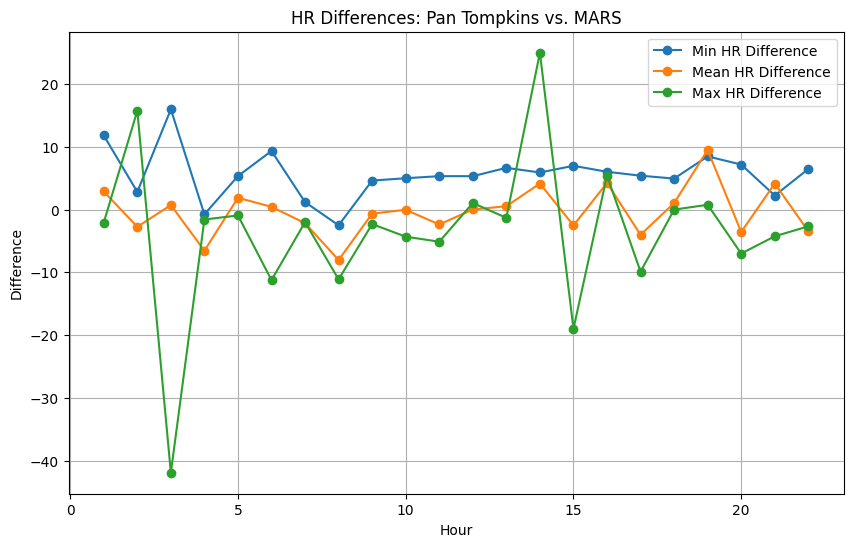

,Mean,Median,Standard Deviation,Range
Hour,11.500000,11.500000,6.493587,21.000000
Min_Diff (Pan Tompkins - MARS),5.628649,5.375539,3.913360,18.474790
Ave_Diff (Pan Tompkins - MARS),-0.294405,-0.002091,3.949724,17.522425
Max_Diff (Pan Tompkins - MARS),-3.577762,-2.185785,12.395371,66.926829


In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
hr_data = pd.read_csv('73455754_hr_data.csv')
hr_statistics = pd.read_csv('hr_statistics.csv')

# Calculate differences and label the datasets
comparison = pd.DataFrame({
    'Hour': hr_data['Hour'],
    'Min_Diff (Pan Tompkins - MARS)': hr_data['Min_HR'] - hr_statistics['Min_HR'],
    'Ave_Diff (Pan Tompkins - MARS)': hr_data['Mean_HR'] - hr_statistics['Mean_HR'],
    'Max_Diff (Pan Tompkins - MARS)': hr_data['Max_HR'] - hr_statistics['Max_HR']
})

# Statistical metrics calculation
metrics = {
    'Mean': comparison.mean(),
    'Median': comparison.median(),
    'Standard Deviation': comparison.std(),
    'Range': comparison.max() - comparison.min()
}

metrics_df = pd.DataFrame(metrics)

# Plot the differences
plt.figure(figsize=(10, 6))
plt.plot(comparison['Hour'], comparison['Min_Diff (Pan Tompkins - MARS)'], label='Min HR Difference', marker='o')
plt.plot(comparison['Hour'], comparison['Ave_Diff (Pan Tompkins - MARS)'], label='Mean HR Difference', marker='o')
plt.plot(comparison['Hour'], comparison['Max_Diff (Pan Tompkins - MARS)'], label='Max HR Difference', marker='o')

plt.title('HR Differences: Pan Tompkins vs. MARS')
plt.xlabel('Hour')
plt.ylabel('Difference')
plt.legend()
plt.grid(True)
plt.show()

metrics_df


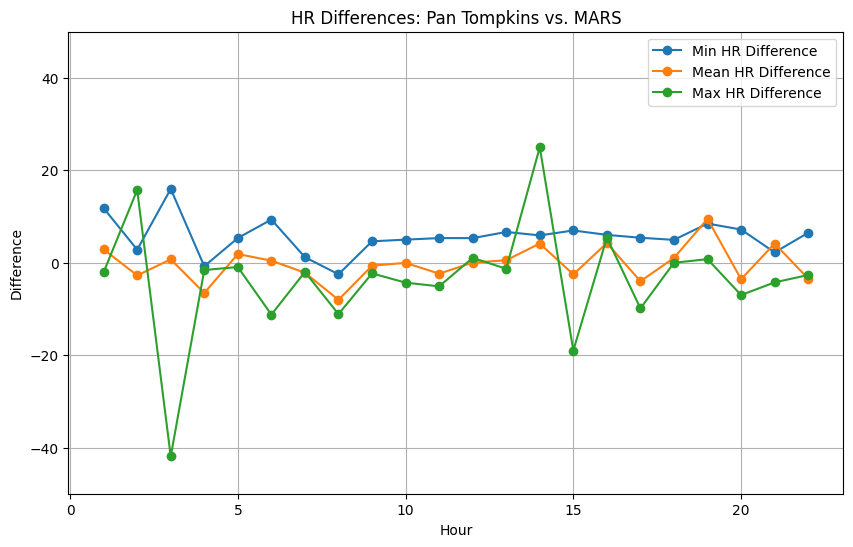

In [20]:
# Plot the differences with y-axis limit set from -50 to 50
plt.figure(figsize=(10, 6))
plt.plot(comparison['Hour'], comparison['Min_Diff (Pan Tompkins - MARS)'], label='Min HR Difference', marker='o')
plt.plot(comparison['Hour'], comparison['Ave_Diff (Pan Tompkins - MARS)'], label='Mean HR Difference', marker='o')
plt.plot(comparison['Hour'], comparison['Max_Diff (Pan Tompkins - MARS)'], label='Max HR Difference', marker='o')

# Set y-axis limits
plt.ylim(-50, 50)

# Add labels and title
plt.title('HR Differences: Pan Tompkins vs. MARS')
plt.xlabel('Hour')
plt.ylabel('Difference')
plt.legend()
plt.grid(True)
plt.show()


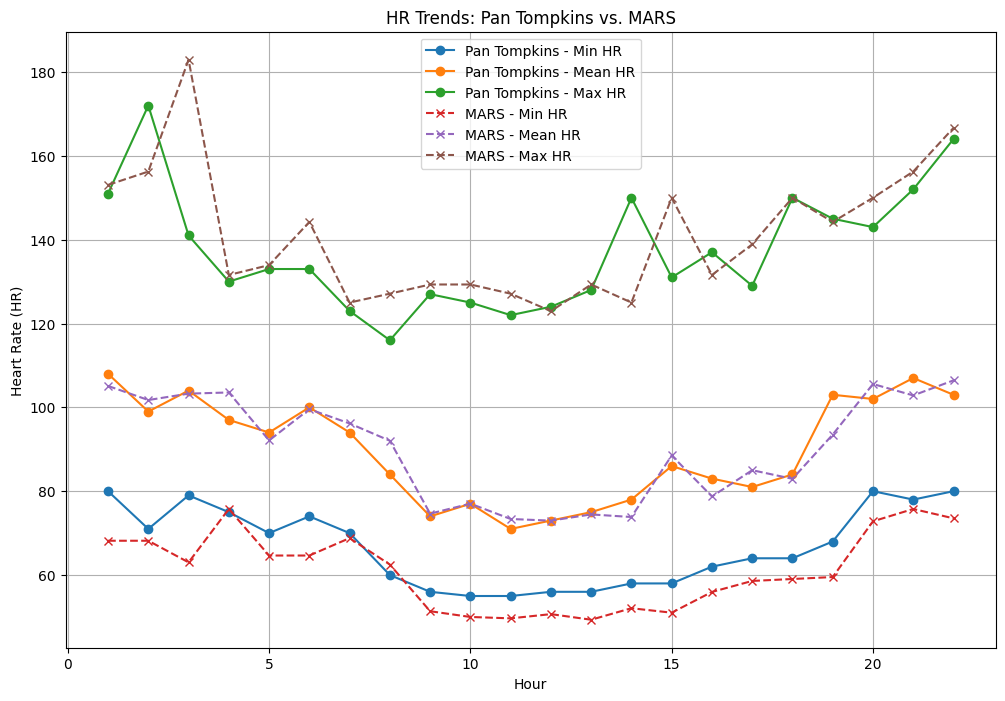

In [21]:
# Plot the overall trends for Min_HR, Mean_HR, and Max_HR for both Pan Tompkins and MARS
plt.figure(figsize=(12, 8))

# Plot Pan Tompkins data
plt.plot(hr_data['Hour'], hr_data['Min_HR'], label='Pan Tompkins - Min HR', marker='o')
plt.plot(hr_data['Hour'], hr_data['Mean_HR'], label='Pan Tompkins - Mean HR', marker='o')
plt.plot(hr_data['Hour'], hr_data['Max_HR'], label='Pan Tompkins - Max HR', marker='o')

# Plot MARS data
plt.plot(hr_statistics['Hour'], hr_statistics['Min_HR'], label='MARS - Min HR', marker='x', linestyle='--')
plt.plot(hr_statistics['Hour'], hr_statistics['Mean_HR'], label='MARS - Mean HR', marker='x', linestyle='--')
plt.plot(hr_statistics['Hour'], hr_statistics['Max_HR'], label='MARS - Max HR', marker='x', linestyle='--')

# Add labels and title
plt.title('HR Trends: Pan Tompkins vs. MARS')
plt.xlabel('Hour')
plt.ylabel('Heart Rate (HR)')
plt.legend()
plt.grid(True)
plt.show()
